In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

import rbm_qst
import rbm_classic

import utils
import paper_functions

# Research

## RBM QST

In [3]:
num_units = 3
num_samples = 100

dataset = utils.dataset_w(num_units, num_samples, hist=False)
r_qst = rbm_qst.RBM_QST(num_units, 3)

# # Replace `r_qst.weights_lambda` with `r_cl.weights`.
# #
# r_cl = rbm_classic.RBM(num_units, 3)  # RBM from rbm_classic.py
# r_cl.train(dataset, max_epochs=150, learning_rate=0.5)
# r_qst.weights_lambda = r_cl.weights

r_qst.train(dataset, dataset, max_epochs=1000, learning_rate=0.0001, debug=True, precise=True)

Epoch 0: objective is 2.08512872356
Epoch 50: objective is 2.06782848166
Epoch 100: objective is 2.05172370329
Epoch 150: objective is 2.03679078797
Epoch 200: objective is 2.02300081046
Epoch 250: objective is 2.01032054384
Epoch 300: objective is 1.99871345392
Epoch 350: objective is 1.98814063348
Epoch 400: objective is 1.97856165298
Epoch 450: objective is 1.96993531225
Epoch 500: objective is 1.96222028527
Epoch 550: objective is 1.95537565617
Epoch 600: objective is 1.94936134991
Epoch 650: objective is 1.94413846456
Epoch 700: objective is 1.93966951476
Epoch 750: objective is 1.93591859727
Epoch 800: objective is 1.93285149016
Epoch 850: objective is 1.93043569698
Epoch 900: objective is 1.92864044665
Epoch 950: objective is 1.92743665891


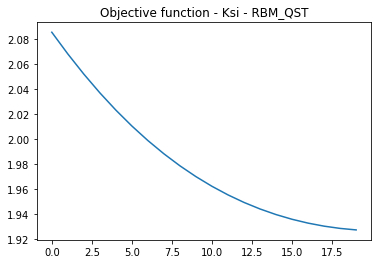

In [4]:
plt.plot(r_qst.objectives)
plt.title('Objective function - Ksi - RBM_QST')
plt.show()

In [5]:
# Fidelity.
fid, states = utils.fidelity_RBM(r_qst, utils.into_dict(dataset))
fid

0.41939085022273259

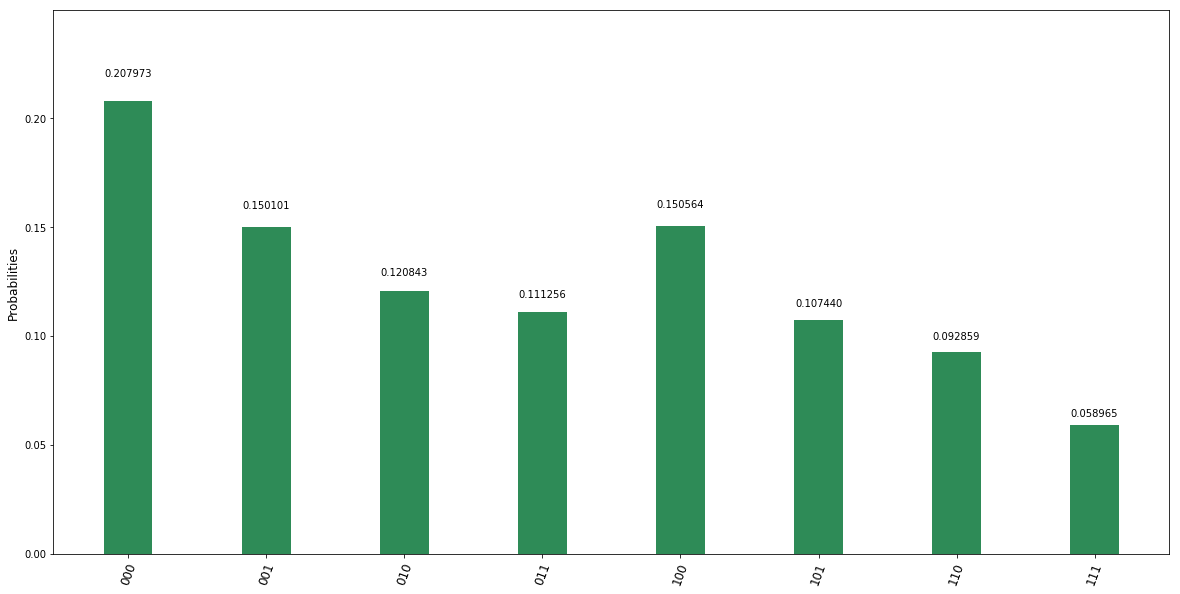

In [6]:
utils.plot_histogram(states)

## Classical RBM

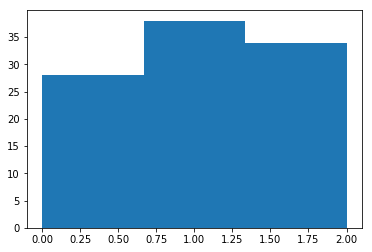

In [7]:
num_units = 3

r_cl = rbm_classic.RBM(num_units, 3)
dataset = utils.dataset_w(num_units, 100, hist=True)

In [8]:
r_cl.train(dataset, max_epochs=500, learning_rate=0.5)

Epoch 0: objective is 2.0722474637
Epoch 50: objective is 1.9297950142
Epoch 100: objective is 1.74226708673
Epoch 150: objective is 1.55948661262
Epoch 200: objective is 1.42581700954
Epoch 250: objective is 1.37105893663
Epoch 300: objective is 1.31445382158
Epoch 350: objective is 1.3001785049
Epoch 400: objective is 1.28344502398
Epoch 450: objective is 1.27246281879


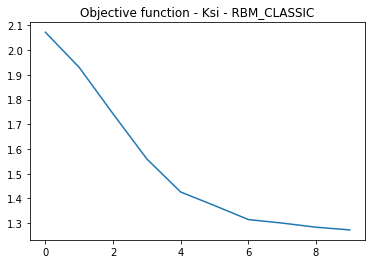

In [9]:
plt.plot(r_cl.objectives)
plt.title('Objective function - Ksi - RBM_CLASSIC')
plt.show()

In [12]:
# Fidelity.
fid, states = utils.fidelity_RBM(r_cl, utils.into_dict(utils.ideal_w(num_units)))
fid

0.90413989950094342

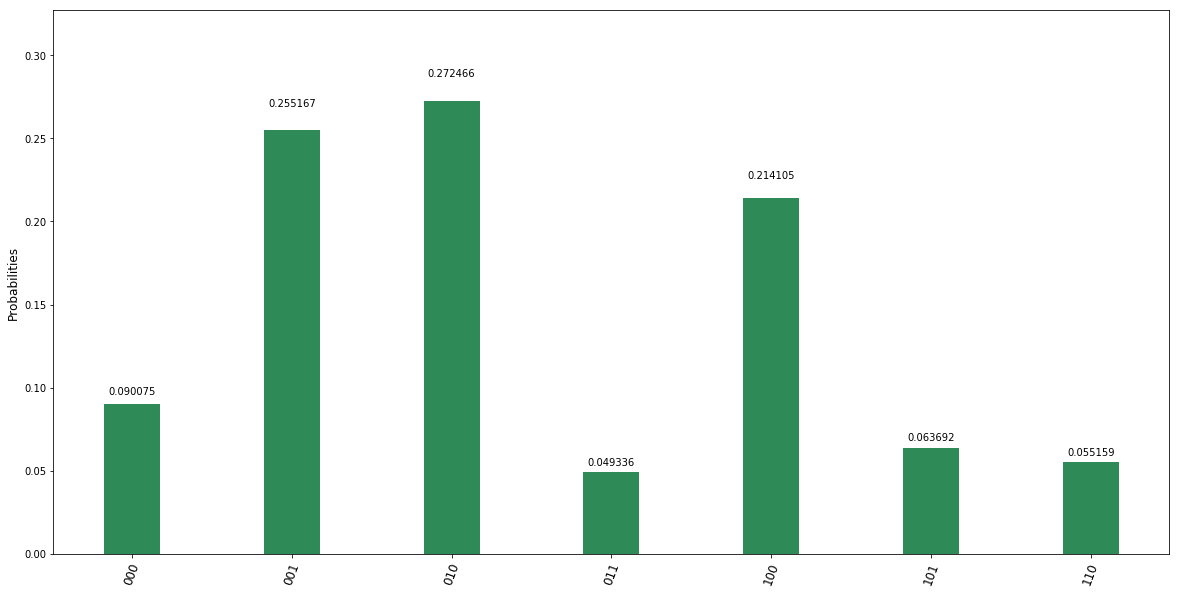

In [13]:
utils.plot_histogram(states)

# Plot Fig.1 b

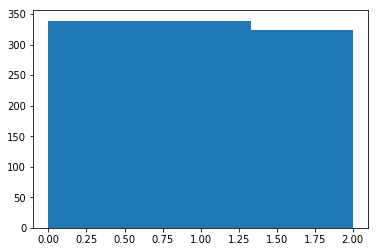

In [14]:
dataset = utils.dataset_w(num_units, 1000, hist=True)

In [19]:
import tqdm

num_units = 3
fidelities = []
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = utils.dataset_w(num_units, N_s)
    
    r_cl = rbm_classic.RBM(num_units, num_units, debug_print=False)
    r_cl.train(dataset, max_epochs=10000, learning_rate=0.3)

    fidelities.append(utils.fidelity_RBM(r_cl, utils.into_dict(utils.ideal_w(num_units)))[0])

overlaps = list(map(lambda x: np.sqrt(x), fidelities))

100%|██████████| 4/4 [00:08<00:00,  2.27s/it]


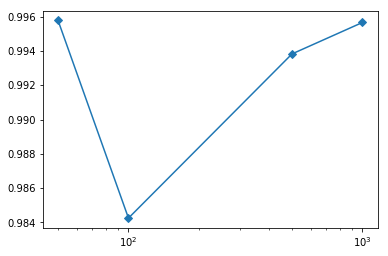

In [20]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.show()